# 2021/11/9

## 照片前處理

### 移動所有照片

In [ ]:
import os,shutil
from tqdm import tqdm  # 加了个进度条
sourceDir=r"/home/coco31429/Desktop/CNN/107/photo"
targetDir=r"/home/coco31429/Desktop/CNN/107/photo_all"
for root, dirs, files in os.walk(sourceDir):
    for file in tqdm(files,desc="Waiting..."):
        shutil.copy(os.path.join(root,file),targetDir) #执行复制操作

### 改 .jpg .PNG為 .png

In [ ]:
import random
import string
import os
from os.path import splitext

def modify_suffix(dirname,old_suffix,new_suffix):
    #找出以png结尾的文件名
    # filter()函数接收一个函数 f 和一个list,得出True的元素
    pngfile = filter(lambda filename:filename.endswith(old_suffix),os.listdir(dirname))

    #分离文件名和后缀
    # os.path.split(‘path’)：按照路径将文件名和路径分割开 （2）os.path.splitext()将文件名和扩展名分开，得到一个2维列表
    basefiles = [os.path.splitext(filename)[0] for filename in pngfile]

    #文件重命名
    for filename in basefiles:
        # print(filename)
        oldname = os.path.join(dirname,filename + old_suffix)
        newname = os.path.join(dirname,filename + new_suffix)
        # 考虑过 oldname为什么不能直接用pngfile（列表）！类型不同
        os.rename(oldname,newname)
        print('%s重命名为%s成功' %(oldname,newname))

modify_suffix('/home/coco31429/Desktop/CNN/103/photo_all','.JPG','.png')

In [ ]:
from PIL import Image

# 讀取圖片
img1 = Image.open('/home/coco31429/Desktop/CNN/107/photo_all/770906043.png')
img1

### 對照 找出不同者

In [1]:
import pandas as pd
df = pd.read_csv("103-more_than_1_concat.csv")  #轉檔 : data_xls.to_csv('1.csv', encoding='utf-8')
df["編碼"] = df["編碼"] + '.png'
df

,地區,村里碼,姓名,號次,性別,出生年次,推薦政黨,得票數,得票率,當選註記,是否現任,編碼,學歷,經歷,政見
0,南投縣南投市康壽里,2,田福川,1,男,1956,無黨籍及未經政黨推薦,312,0.3196,0,否,370401021.png,一、南華大學旅遊管理研究所畢業\n二、南開科技大學畢業\n三、南投高中畢業\n四、南投國中畢...,1.南投市康壽社區發展協會 總幹事\n2.天鵬旅行社(原川田)總經理\n3.南投縣旅行商業同...,"一、設置關懷爆點,積極關懷·里內獨居老人,外配,愛族的起\n居生活,並辦理里民社會急難救助,..."
1,南投縣南投市康壽里,2,林華騰,2,男,1950,無黨籍及未經政黨推薦,396,0.4057,1,是,370401022.png,元培醫專,林x光檢驗中心負責人。\n南投市第19屆康壽里里長。,專職里長。\n有事不必到我家，打手機到府服務： 0918629668
2,南投縣南投市康壽里,2,吳秋庚,3,男,1954,無黨籍及未經政黨推薦,268,0.2745,0,否,370401023.png,和平國小\n南投縣投中\n明道高中,康壽里十七、十八屆里長,協助弱勢里民，反應里民所需，維護改善里內居家環境。
3,南投縣南投市軍功里,10,廖永裕,1,男,1953,無黨籍及未經政黨推薦,1125,0.3703,1,否,370401101.png,初中畢業,現任：\n一、南投縣總工會監事會召集人\n二、南投縣音樂工會理事長\n三、南投市軍功記冨發展...,一、積極改善軍功里內淹水地區水患之整治工作。\n二、結合各級民意代表，以爭取補助經費來加強里...
4,南投縣南投市軍功里,10,曾中順,2,男,1952,無黨籍及未經政黨推薦,887,0.2919,0,是,370401102.png,和平國小,一、現任平和國小家長會顧問。\n二、現任第19屆軍功里里長。,向公所、縣府爭取經費來建設本里。
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11507,雲林縣水林鄉欍埔村,21,張美秀,1,女,1960,無黨籍及未經政黨推薦,150,0.2664,0,否,370520211.png,中興國小畢業、蔦松國中畢業。,1.目前擔任瓊埔社區發展協會總幹事並承辦水林鄉第一樂齢學習中心。,1.積極爭取弱勢、獨居、老人福利。2.爭取村里軟硬體設備及建設。
11508,雲林縣水林鄉欍埔村,21,鄭火忠,2,男,1953,無黨籍及未經政黨推薦,144,0.2557,0,否,370520212.png,中興國小畢業。,現任:順天宮任委員、瓊埔社區長壽俱樂部副會長、總幹事、水林鄉農會小組長。,"一、配合公所施政,爭取經費建設村里。二、關懷村里弱勢、長者及獨居老人。三、全力為民服務,做好..."
11509,雲林縣水林鄉欍埔村,21,蘇鐵,3,男,1952,無黨籍及未經政黨推薦,269,0.4777,1,否,370520213.png,中興國小畢業。,第十二屆瓊埔村村長、第十五屆港口宮委員、第十七屆港口宮委員、第十八屆港口宮委員、現任瓊埔村順...,一、呷咱瓊埔村鄉親大家站在一起向鄉、縣政府争取地方建設。二、加強社區全面監視系統以維護地方財...
11510,雲林縣水林鄉溪墘村,24,蔡錦明,1,男,1951,無黨籍及未經政黨推薦,325,0.4887,0,否,370520241.png,和安國小。,15、16、17農會代表。,一、服務村民。二、水道路修護。三、整理環境衛生。四、關心老人與福利。五、促進社區發展。


In [3]:
# 讀取資料夾內檔案
import os
yourPath = '103/103_photo_all/' #'/home/coco31429/Desktop/CNN/103/photo_all/'
allFileList = os.listdir(yourPath)

In [4]:
df_photo = pd.DataFrame(allFileList) 
df_photo

,0
0,320006603.png
1,360012582.png
2,370806111.png
3,330008271.png
4,320007211.png
...,...
13162,340010191.png
13163,370320151.png
13164,370218081.png
13165,370509131.png


In [5]:
ans_notin_df = df_photo[~df_photo[0].isin(set(df['編碼']))]
ans_notin_df

,0
3,330008271.png
4,320007211.png
5,370101031.png
6,371201081.png
15,340014091.png
...,...
13142,370315151.png
13149,360009341.png
13154,360025031.png
13155,370517061.png


In [7]:
len(ans_notin_df)

2861

In [62]:
#save
ans_notin_df.to_csv("107photo_no_in_text.csv",index=False)

## 分佈圖（圖形長寬）

In [10]:
from PIL import Image
import os

file_path = '/home/coco31429/Desktop/AI/103/103_photo_all/'
allFileList = os.listdir(file_path)
w,h = [],[]
for file in allFileList:
    img = Image.open(file_path+"/"+file)
    w.append(img.width)       #图片的宽
    h.append(img.height)       #图片的高


In [11]:
sum(i > 1024 for i in w  ) #sum(i > 1024 for i in w  ) #

0

In [12]:
sum(i > 1024 for i in h)

0

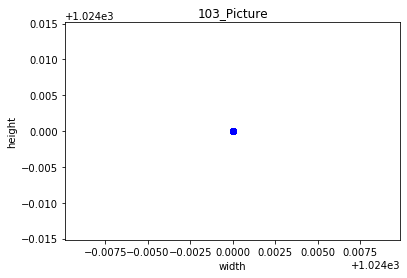

In [13]:
import matplotlib.pyplot as plt


# 製作figure  
fig = plt.figure()   

#圖表的設定
ax = fig.add_subplot(1, 1, 1)

#散佈圖
ax.scatter(w, h, color='blue')
plt.gca().update(dict(title='103_Picture', xlabel='width', ylabel='height'))
plt.show() 

In [14]:
# datafram
from pandas import Series,DataFrame
import pandas as pd

data = {'name':allFileList,
       'width':w,
       'height':h}
df_103photo = DataFrame(data)

In [15]:
df_103photo

,name,width,height
0,320006603.png,1024,1024
1,360012582.png,1024,1024
2,370806111.png,1024,1024
3,330008271.png,1024,1024
4,320007211.png,1024,1024
...,...,...,...
13162,340010191.png,1024,1024
13163,370320151.png,1024,1024
13164,370218081.png,1024,1024
13165,370509131.png,1024,1024


In [8]:
# 篩選長寬
mask1 = df_103photo["width"] < 1024
mask2 = df_103photo["height"] < 1024
df_103photo_1024 = df_103photo[(mask1 & mask2)] 
df_103photo_1024

,name,width,height
0,320006603.png,347,459
1,360012582.png,487,670
3,330008271.png,481,597
4,320007211.png,236,319
5,370101031.png,354,483
...,...,...,...
13162,340010191.png,347,485
13163,370320151.png,441,551
13164,370218081.png,458,710
13165,370509131.png,409,561


## DF (對照text 形成新df)

In [17]:
import pandas as pd

data = {'name':allFileList}
df_103photo_1024 = DataFrame(data)
df_103photo_1024

,name
0,320006603.png
1,360012582.png
2,370806111.png
3,330008271.png
4,320007211.png
...,...
13162,340010191.png
13163,370320151.png
13164,370218081.png
13165,370509131.png


In [18]:
# 拿掉不在text者
df_103photo_1024 = df_103photo_1024[df_103photo_1024["name"].isin(set(df['編碼']))]
df_103photo_1024

,name
0,320006603.png
1,360012582.png
2,370806111.png
7,370506052.png
8,370715021.png
...,...
13161,370802201.png
13162,340010191.png
13163,370320151.png
13164,370218081.png


In [19]:
df.rename(columns={'編碼':'name'},inplace=True)
df.rename(columns={'當選註記':'result'},inplace=True)
df

,地區,村里碼,姓名,號次,性別,出生年次,推薦政黨,得票數,得票率,result,是否現任,name,學歷,經歷,政見
0,南投縣南投市康壽里,2,田福川,1,男,1956,無黨籍及未經政黨推薦,312,0.3196,0,否,370401021.png,一、南華大學旅遊管理研究所畢業\n二、南開科技大學畢業\n三、南投高中畢業\n四、南投國中畢...,1.南投市康壽社區發展協會 總幹事\n2.天鵬旅行社(原川田)總經理\n3.南投縣旅行商業同...,"一、設置關懷爆點,積極關懷·里內獨居老人,外配,愛族的起\n居生活,並辦理里民社會急難救助,..."
1,南投縣南投市康壽里,2,林華騰,2,男,1950,無黨籍及未經政黨推薦,396,0.4057,1,是,370401022.png,元培醫專,林x光檢驗中心負責人。\n南投市第19屆康壽里里長。,專職里長。\n有事不必到我家，打手機到府服務： 0918629668
2,南投縣南投市康壽里,2,吳秋庚,3,男,1954,無黨籍及未經政黨推薦,268,0.2745,0,否,370401023.png,和平國小\n南投縣投中\n明道高中,康壽里十七、十八屆里長,協助弱勢里民，反應里民所需，維護改善里內居家環境。
3,南投縣南投市軍功里,10,廖永裕,1,男,1953,無黨籍及未經政黨推薦,1125,0.3703,1,否,370401101.png,初中畢業,現任：\n一、南投縣總工會監事會召集人\n二、南投縣音樂工會理事長\n三、南投市軍功記冨發展...,一、積極改善軍功里內淹水地區水患之整治工作。\n二、結合各級民意代表，以爭取補助經費來加強里...
4,南投縣南投市軍功里,10,曾中順,2,男,1952,無黨籍及未經政黨推薦,887,0.2919,0,是,370401102.png,和平國小,一、現任平和國小家長會顧問。\n二、現任第19屆軍功里里長。,向公所、縣府爭取經費來建設本里。
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11507,雲林縣水林鄉欍埔村,21,張美秀,1,女,1960,無黨籍及未經政黨推薦,150,0.2664,0,否,370520211.png,中興國小畢業、蔦松國中畢業。,1.目前擔任瓊埔社區發展協會總幹事並承辦水林鄉第一樂齢學習中心。,1.積極爭取弱勢、獨居、老人福利。2.爭取村里軟硬體設備及建設。
11508,雲林縣水林鄉欍埔村,21,鄭火忠,2,男,1953,無黨籍及未經政黨推薦,144,0.2557,0,否,370520212.png,中興國小畢業。,現任:順天宮任委員、瓊埔社區長壽俱樂部副會長、總幹事、水林鄉農會小組長。,"一、配合公所施政,爭取經費建設村里。二、關懷村里弱勢、長者及獨居老人。三、全力為民服務,做好..."
11509,雲林縣水林鄉欍埔村,21,蘇鐵,3,男,1952,無黨籍及未經政黨推薦,269,0.4777,1,否,370520213.png,中興國小畢業。,第十二屆瓊埔村村長、第十五屆港口宮委員、第十七屆港口宮委員、第十八屆港口宮委員、現任瓊埔村順...,一、呷咱瓊埔村鄉親大家站在一起向鄉、縣政府争取地方建設。二、加強社區全面監視系統以維護地方財...
11510,雲林縣水林鄉溪墘村,24,蔡錦明,1,男,1951,無黨籍及未經政黨推薦,325,0.4887,0,否,370520241.png,和安國小。,15、16、17農會代表。,一、服務村民。二、水道路修護。三、整理環境衛生。四、關心老人與福利。五、促進社區發展。


In [20]:
# 加入是否當選 merge
# df_103photo_1024["result"] = df_103photo_1024['name'].map(df.set_index(['name'])['result']).fillna('')
df_103photo_1024["result"] = df_103photo_1024['name'].map(dict(zip(df['name'],df['result']))).fillna('')

/tmp/ipykernel_1498796/1445329308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_103photo_1024["result"] = df_103photo_1024['name'].map(dict(zip(df['name'],df['result']))).fillna('')


In [21]:
#修正
df_103photo_1024['result'].replace('當選註記',0,inplace=True)
df_103photo_1024['result'].replace('0',0,inplace=True)
df_103photo_1024['result'].replace('1',1,inplace=True)
df_103photo_1024

/home/coco31429/.local/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,name,result
0,320006603.png,0
1,360012582.png,1
2,370806111.png,0
7,370506052.png,1
8,370715021.png,1
...,...,...
13161,370802201.png,1
13162,340010191.png,0
13163,370320151.png,0
13164,370218081.png,1


In [22]:
len(df_103photo_1024)

10306

In [23]:
len(df_103photo_1024[df_103photo_1024['result'] == 1])

4506

In [24]:
len(df_103photo_1024[df_103photo_1024['result'] == 0])

5800

In [25]:
#save
df_103photo_1024.to_csv("103photo_1024_more_than_1.csv",index=False)

## 邊框

In [ ]:
import torchvision.transforms as transforms
from PIL import Image
# 讀取圖片
img1 = Image.open('test/371006041.png')
img2 = Image.open('test/370520112.png')
# img3 = Image.open('310009181.png')
w1 = img1.width
h1 = img1.height
w2 = img2.width
h2 = img2.height
# 修改大小
size = (512, 512)
transform = transforms.CenterCrop(size)
center_crop1 = transform(img1)
center_crop2 = transform(img2)
# center_crop3 = transform(img3)
# 儲存圖片
center_crop1.save('371006041_center_crop_512_small.png')
center_crop2.save('370520112_center_crop_512_big.png')
# center_crop3.save('310009181_center_crop_512.jpg')
print("big w :",w1)
print("big h :",h1)
print("small w :",w2)
print("small h :",h2)

## 純圖片指定座標取得顏色

In [11]:
def rgb_of_pixel(img_path, x, y):
    im = Image.open(img_path).convert('RGB')
    r, g, b = im.getpixel((x, y))
    a =[r, g, b]
    return a

In [12]:
from PIL import Image
# 讀取圖片
img1_rgb = rgb_of_pixel('test/371006041.png',1,1)
img2_rgb = rgb_of_pixel('test/370520112.png',1,1)
print(img1_rgb)
print(img2_rgb)

[255, 255, 255]
[208, 208, 208]


## 填充至指定大小

In [46]:
import os
import cv2
import sys
from PIL import Image

#定义图像缩放函数
def process_image(img, min_side):
    size = img.shape
    h, w = size[0], size[1]
    #长边缩放为min_side
    scale = max(w, h) / float(min_side)
    new_w, new_h = int(w/scale), int(h/scale)
    resize_img = cv2.resize(img, (new_w, new_h))
    # 填充至min_side * min_side
    if new_w % 2 != 0 and new_h % 2 == 0:
        top, bottom, left, right = (min_side-new_h)/2, (min_side-new_h)/2, (min_side-new_w)/2 + 1, (min_side-new_w)/2
    elif new_h % 2 != 0 and new_w % 2 == 0:
        top, bottom, left, right = (min_side-new_h)/2 + 1, (min_side-new_h)/2, (min_side-new_w)/2, (min_side-new_w)/2
    elif new_h % 2 == 0 and new_w % 2 == 0:
        top, bottom, left, right = (min_side-new_h)/2, (min_side-new_h)/2, (min_side-new_w)/2, (min_side-new_w)/2
    else:
        top, bottom, left, right = (min_side-new_h)/2 + 1, (min_side-new_h)/2, (min_side-new_w)/2 + 1, (min_side-new_w)/2
     
    #變色 BACK = [0,0,0]
    im_ = Image.open(path + filename).convert('RGB')
    r, g, b = im_.getpixel((1, 1))
    BACK =[r, g, b]
    
    pad_img = cv2.copyMakeBorder(resize_img, int(top), int(bottom), int(left), int(right), cv2.BORDER_CONSTANT, value=BACK) #从图像边界向上,下,左,右扩的像素数目
    return pad_img


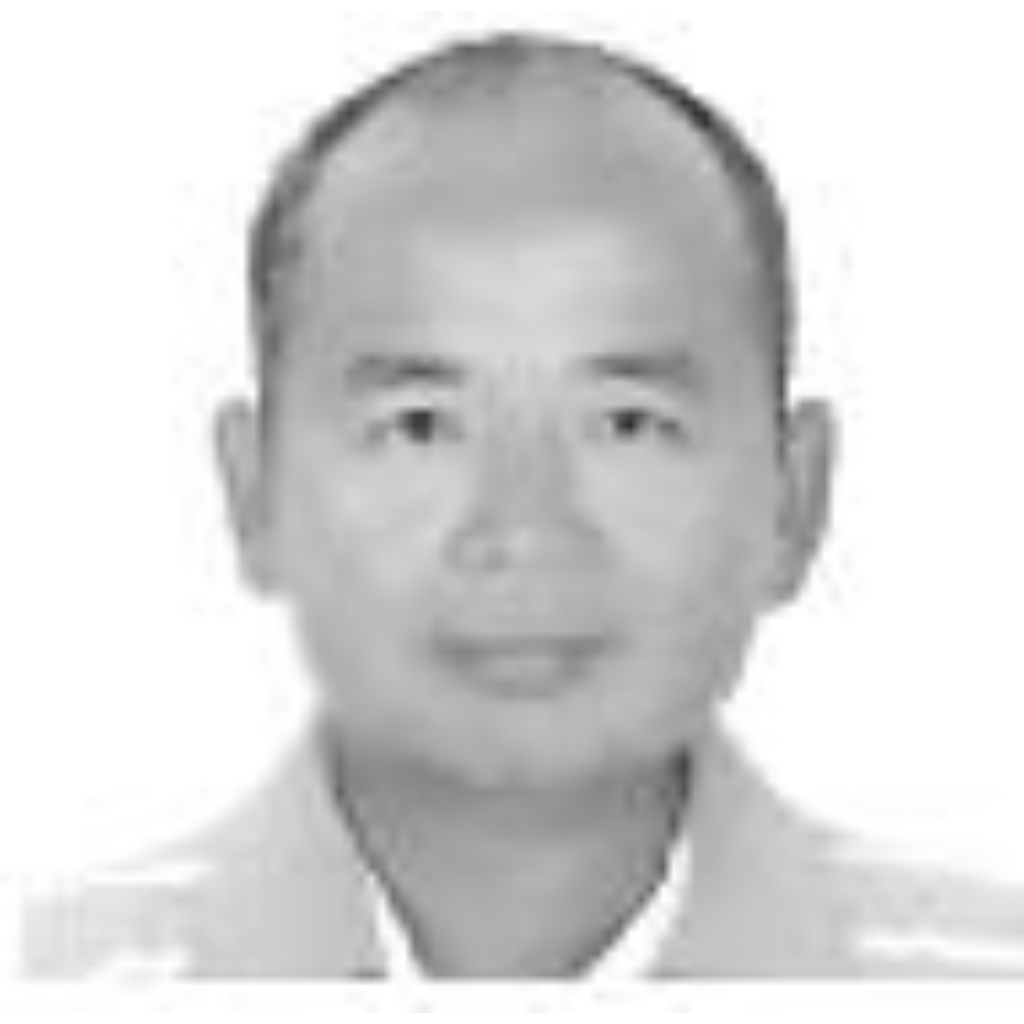

In [45]:
path = 'test/'
filename ='371006041.png'
im = cv2.imread(path + filename)
#输入图片和尺寸
img_new = process_image(im, 1024)
cv2.imwrite("Image_test_371006041.png", img_new)
img_ = Image.open('Image_test_371006041.png')
img_

In [47]:
#你的图片文件夹路径
path = '/home/coco31429/Desktop/CNN/103/photo_all/' #"D:/2018/aa/E/"

num = 0
yname = []
# 批量重命名 保证没有中文名字 后面会改回来
for filename in os.listdir(path):
    im = cv2.imread(filename)
    name = filename.split('.')
    yname.append(name[0])
    os.rename(os.path.join(path, filename), os.path.join(path, str(num) + '.png'))
    num+=1
# 批量转换
for filename in os.listdir(path):
    im = cv2.imread(path + filename)
    #输入图片和尺寸
    img_new = process_image(im, 1024)
    cv2.imwrite(path + filename, img_new)
    num = filename.split('.')
    num = num[0]
    name = yname[eval(num)]
    os.rename(os.path.join(path, filename), os.path.join(path, name + '.png'))
 
 

# Resize(256,256)

In [70]:
import os
import cv2

path = '/home/coco31429/Desktop/CNN/103/103_photo_all/'

IMG_SIZE=256

for filename in os.listdir(path):
    img_array=cv2.imread(path + filename)
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
#     num = filename.split('.')
#     img_name = num[0]
    save_path='/home/coco31429/Desktop/CNN/103/103_photo_all_256/'+filename

    cv2.imwrite(save_path,new_array)

# Model

## 切割train dev

In [26]:
photo_df = pd.read_csv("103photo_1024_more_than_1.csv") 
photo_df.rename(columns={'name':'image','result':'label'},inplace=True)
# del photo_df["width"]
# del photo_df["height"]
photo_df

,image,label
0,320006603.png,0
1,360012582.png,1
2,370806111.png,0
3,370506052.png,1
4,370715021.png,1
...,...,...
10301,370802201.png,1
10302,340010191.png,0
10303,370320151.png,0
10304,370218081.png,1


In [27]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(photo_df, test_size=0.2)

In [31]:
print(len(train))
print(len(test))
print(len(train[train['label'] == 0]))
print(len(test[test['label'] == 0]))

8244
2062
4637
1163


In [29]:
train.to_csv("103_train_1024_more_than_1.csv",index=False)
test.to_csv("103_dev_1024_more_than_1.csv",index=False)